# 3.4 Time Independent Schrodinger Equation
One of the most important eigenvalue problems in physics is the time independent Schrodinger equation. The equation in 3D is,
$$ -\frac{\hbar^2}{2m} \nabla^2\psi(\vec{r}) + V(\vec{r})\psi(\vec{r}) = E\psi(\vec{r}) $$
In 1D,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

Here this equation is solved numerically by the following methods -
1. Central Difference Method and
2. Numerov Method.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.4.1 Schrodinger equation - Central Potential 
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ p(x) = 0 $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

Consider the potential,
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

In [2]:
from Ch3_3_fuctions import prop_central_diff, psiNorm, center_diff_eigval

print(f'prop_central_diff: {prop_central_diff.__doc__}')
print(f'psiNorm {psiNorm.__doc__}')
print(f'center_diff_eigval {center_diff_eigval.__doc__}')

prop_central_diff: 
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    
psiNorm None
center_diff_eigval 
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    


c:\Users\suman\PYTHON_FOLDER\BOOKS\book4_sem_4_5_Python\Ch3_3_fuctions.py:49: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:
c:\Users\suman\PYTHON_FOLDER\BOOKS\book4_sem_4_5_Python\Ch3_3_fuctions.py:28: RuntimeWarning: overflow encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
c:\Users\suman\PYTHON_FOLDER\BOOKS\book4_sem_4_5_Python\Ch3_3_fuctions.py:28: RuntimeWarning: invalid value encountered in double_scalars
  yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d


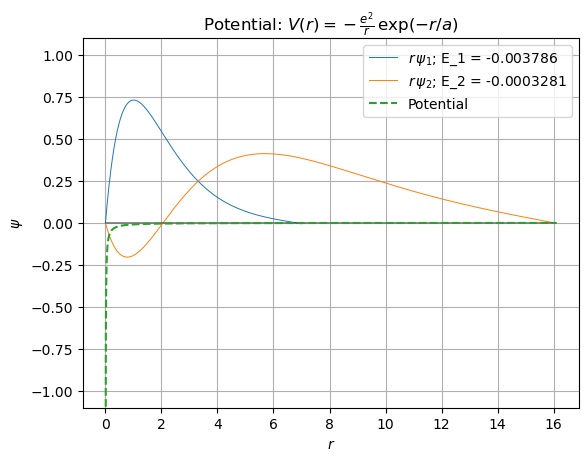

In [3]:
def V(e2, r):
    a = 7.5
    return  -e2/r * np.exp(-r/a)
hcut, m = 0.1, 1
e2 = 0.01
mh2 = 2*m/hcut**2
def p(r):
    return 0
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 0.005
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [7.0,16.1], 0

for nodesn in range(2):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(e2, r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)$')
plt.grid()
plt.show()

### Potential Well

#### Infinite Potential well

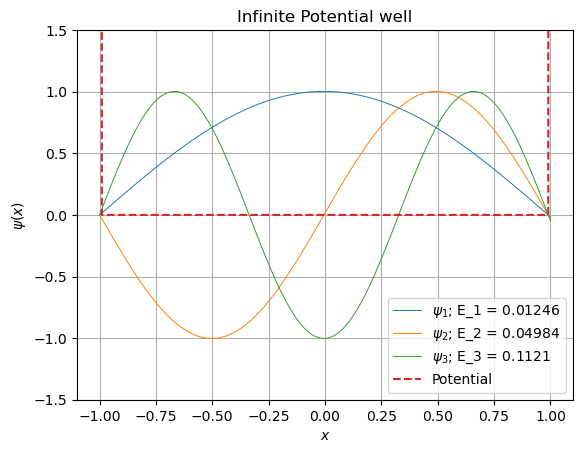

In [4]:
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1, 0, 1, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite Potential well')
plt.grid()
plt.show()

#### Finite Potential well

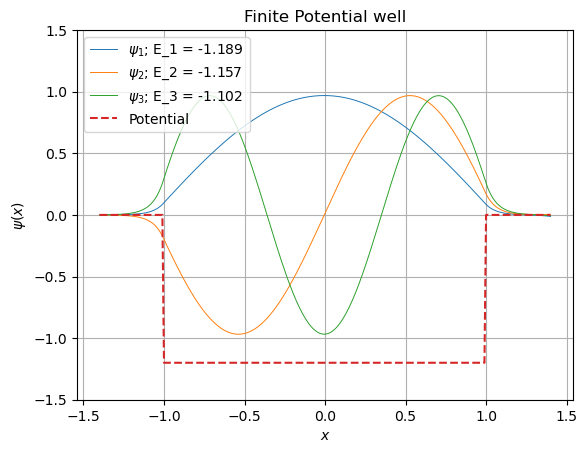

In [5]:
def V(x):
    l0, l1, V0 = -1, 1, -1.2
    if l0<x and x<l1:
        pot = V0
    else:
        pot = 0
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = -1.4, 0, 1.4, 0

for nodesn in range(0,3):
    Emn, Emx = V(0), V(x0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.5)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Finite Potential well')
plt.grid()
plt.show()

#### Triangular potential well

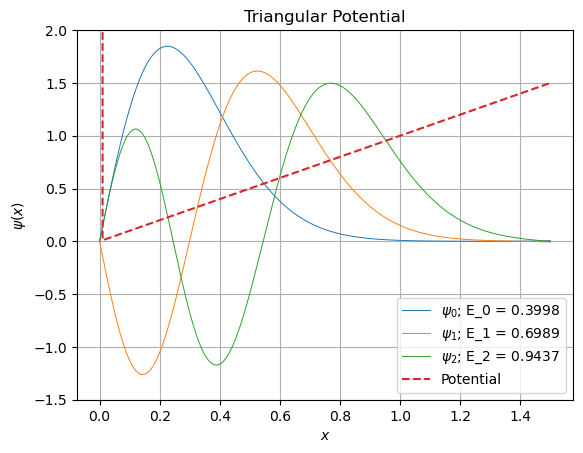

In [6]:
def V(x):
    a, V0 = 1, 2000
    if x <= 0:
        pot = V0
    else:
        pot = a*x
    return pot
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def p(x):
    return 0
def q(E, x):
    return -mh2 *(E - V(x))
def rfn(x):
    return 0

dx = 1e-2
tol = 1e-6
mxitr = 100
x0, psi0, xN, psiN = 0, 0, 1.5, 0

for nodesn in range(0,3):
    Emn, Emx = -1, V(0)
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, x, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    x0, psi0, xN, psiN, psi1, dx, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dx)
        x = np.array(x)
        plt.plot(x, psi, label=f'$\psi_{nodesn}$; E_{nodesn} = {E:.4}',lw=0.7)

plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Triangular Potential')
plt.grid()
plt.show()

### Radial equation
The radial equation is,
$$ \frac{d^2R}{dr^2} +\frac{2}{r} \frac{dR}{dr} + \frac{2m}{\hbar^2} (E-V(r)) R(r) = 0 $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
we can notice,
$$ y(x) = R(r) $$
$$ p(x) = -\frac{2}{r} $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

#### Radial part of Hydrogen atom problem
Here the potential is,
$$ V(r) = -\frac{e^2}{4\pi\epsilon_0 r} $$

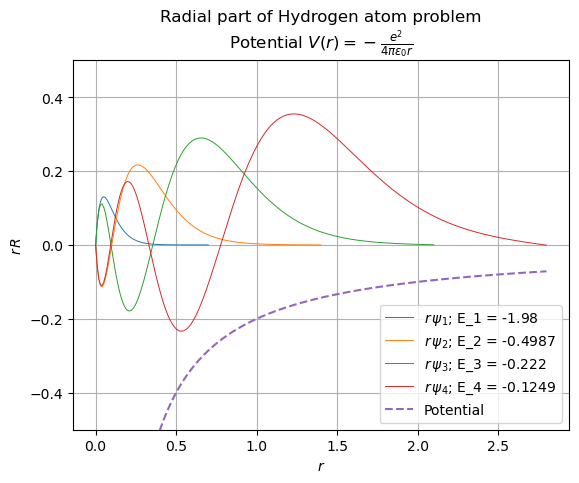

In [7]:
hcut, m, e2 = 0.1, 1, 0.2
mh2 = 2*m/hcut**2

def V(e2, r):
    return -e2/r
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(e2, r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 1000
r0, psi0, rN, psiN = 1e-6, 0, np.arange(1,5)*0.7, 0

for nodesn in range(4):
    Emn, Emx = V(e2, r0), V(e2, rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.ylim(-0.5,0.5)
plt.plot(r, V(e2,r), '--', label='Potential')
plt.legend()
plt.title('Radial part of Hydrogen atom problem\n'+
          'Potential $V(r) = -\\frac{e^2}{4\pi\epsilon_0 r}$')
plt.grid()
plt.show()

Now, consider
$$ V(r) = e^{-6r} -e^{-3r} $$

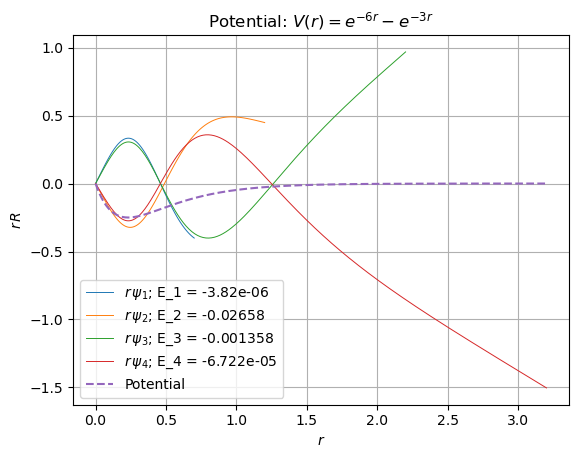

In [8]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2

def V(r):
    return np.exp(-6*r) -np.exp(-3*r)
def p(r):
    return -2/r
def q(E, r):
    return -mh2 *(E - V(r))
def rfn(r):
    return 0

dr = 1e-2
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-6, 0, [0.7,1.2,2.2,3.2], 0

for nodesn in range(4):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        rpsi = r*psi
        plt.plot(r, rpsi, label=f'$r\,\psi_{nodesn+1}$; E_{nodesn+1} = {E:.4}',lw=0.7)
plt.xlabel('$r$')
plt.ylabel('$r\,R$')
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = e^{-6r} -e^{-3r}$')
plt.grid()
plt.show()

Here the eigenvalues are dependent on the choice of boundary (i.e. $r_N$ here) and the eigenfunctions diverges at the boundary.

## 3.4.2 Solution of Schrodinger equation by Numerov method
The time independent Schrodinger equation in 1D is,
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For central potential $V=V(r)$, the time independent (1D) Schrodinger will be reduced to,
$$ \frac{d^2\psi}{dr^2} = \frac{2m}{\hbar^2} \, (V(r)-E) \,\psi(r) $$

Now, comparing the above equation with our general differential equation,
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
we can notice,
$$ y(x) = \psi(r) $$
$$ q(\lambda, x) = -\frac{2m}{\hbar^2} (E-V(r)) $$
$$ r(x) = 0 $$

In [9]:
from Ch3_3_fuctions import propNumerov, psiNorm, NumerovEigVal

print(f'propNumerov: {propNumerov.__doc__}')
print(f'\nNumerovEigVal: {NumerovEigVal.__doc__}')

propNumerov: 
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    

NumerovEigVal: 
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    


### Infinite potential well

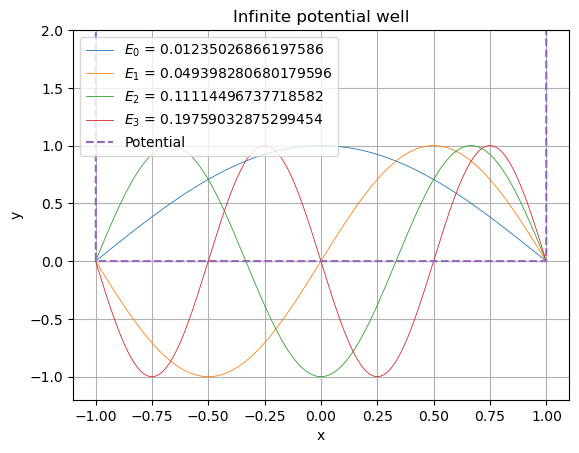

In [10]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    l0, l1, V0 = -1, 1, 500
    if l0<x and x<l1:
        pot = 0
    else:
        pot = V0
    return pot

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
x0, xN = -1, 1
y0, yN = 0, 0
Emin, Emax = V(0), V(x0)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0, y0, xN, yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.2,2)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Infinite potential well')
plt.grid()
plt.show()

### Linear Harmonic Oscillator
The potential (1D) is,
$$ V(x) = \frac{1}{2}kx^2 $$

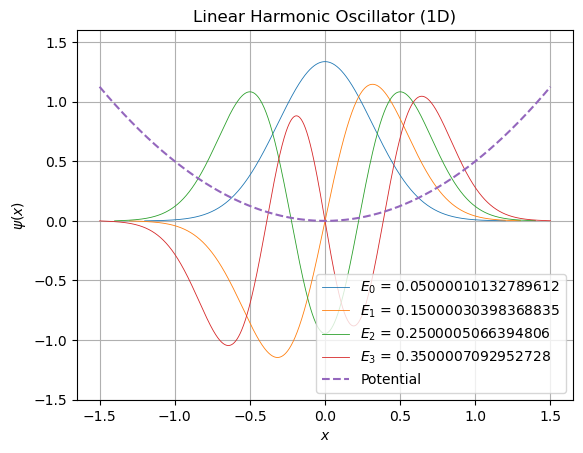

In [11]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(x):
    k = 1
    return (1/2)*k*x**2

def q(E, x):
    return -mh2*(E-V(x))
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
x0, xN = -bnd, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(4):
    y1 = (-1)**nodesn*1e-4
    E, x, y = NumerovEigVal(Emin, Emax, q, r, x0[nodesn], y0, xN[nodesn], yN, 
                            y1, dx, nodesn, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.ylim(-1.5,1.6)
Vx = [V(i) for i in x]
plt.plot(x, Vx, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator (1D)')
plt.grid()
plt.show()

### Harmonic Oscillator with perturbation
Let the potential be,
$$ V(r) = \frac{1}{2}kr^2 + \frac{1}{3} br^3 $$
(This potential is actually originated from the interaction force, $F(r)=-kr-br^2$.)

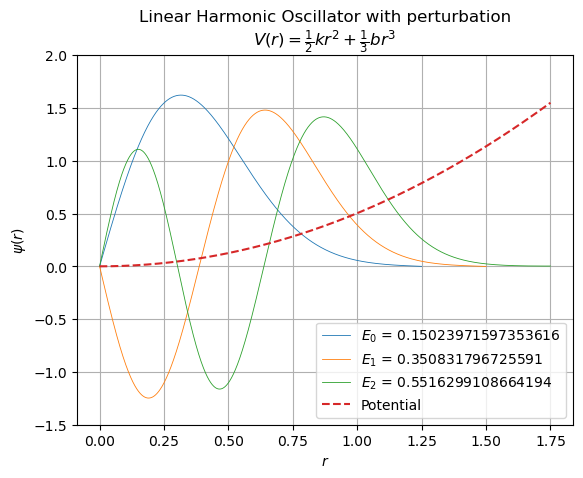

In [12]:
hcut, m = 0.1, 1
mh2 = 2*m/hcut**2
def V(r):
    k, b = 1, 0.01
    return (1/2)*k*r**2 +(1/3)*b*r**3

def q(E, r):
    return -mh2*(E-V(r))
def rfn(r):
    return 0

dr = 0.001
tol = 1e-6
mxitr = 100
bnd = np.array([1.25, 1.5, 1.75, 2, 2.25, 2.5])
r0, rN = 0, bnd
y0, yN = 0, 0
Emin, Emax = 0, V(20)

for nodesn in range(3):
    y1 = (-1)**nodesn*1e-4
    E, r, y = NumerovEigVal(Emin, Emax, q, rfn, r0, y0, rN[nodesn], yN, 
                            y1, dr, nodesn, tol, mxitr)
    y = psiNorm(y, dr)
    plt.plot(r, y, label=f'$E_{nodesn}$ = {E}', lw=0.6)
plt.xlabel('$r$')
plt.ylabel('$\psi(r)$')
plt.ylim(-1.5,2)
Vr = [V(i) for i in r]
plt.plot(r, Vr, '--', label='Potential')
plt.legend(loc='best')
plt.title('Linear Harmonic Oscillator with perturbation\n'+
          '$ V(r) = \\frac{1}{2}kr^2 + \\frac{1}{3} br^3 $')
plt.grid()
plt.show()